In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10])
model = LinearRegression()
model.fit(X, y)
print("Predictions:", model.predict(X))

Predictions: [ 2.  4.  6.  8. 10.]


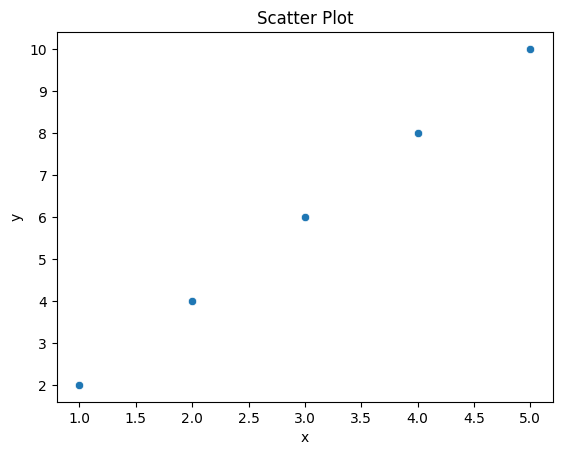

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Sample dataset
data = pd.DataFrame({'x': [1,2,3,4,5], 'y': [2,4,6,8,10]})
# Create scatter plot
sns.scatterplot(x='x', y='y', data=data)
plt.title("Scatter Plot")
plt.show()

In [3]:
import numpy as np
# Example: Create a NumPy array and perform basic operations
arr = np.array([1, 2, 3, 4, 5])
print(np.mean(arr)) # Mean of the array

3.0


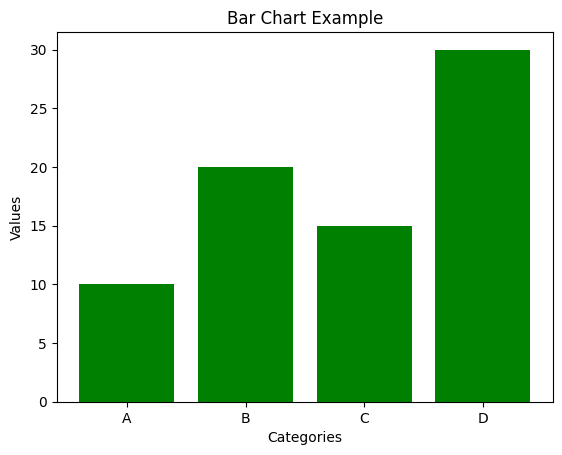

In [4]:
import matplotlib.pyplot as plt
categories = ["A", "B", "C", "D"]
values = [10, 20, 15, 30]
plt.bar(categories, values, color='green')
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart Example")
plt.show()

In [5]:
import pandas as pd
df = pd.read_csv("data.csv") # Reading a CSV file
df.to_csv("output.csv", index=False) # Writing to a CSV file
print(df.head()) # Display first few rows

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Drop missing values
df_cleaned = df.dropna()
print("Dataset after dropping missing values:", df_cleaned.shape)
# Handle missing values
df['age'] = df['age'].fillna(df['age'].mean()) # Fill age with mean
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0]) # Fill
embarked with mode
# Convert deck to string and replace NaN
df['deck'] = df['deck'].astype(str).fillna('Unknown')
# Drop remaining NaN values if needed

In [ ]:
df = df.dropna()
print(df.isnull().sum()) # Confirm no missing values

In [ ]:
#LABEL ENCODING
#Converts categories into numbers (e.g., male → 0, female → 1).
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender']) # 0 for male, 1 for female
print(df['gender'].head())

In [ ]:
#3.3.2 One-Hot Encoding (For Multi-Class Categories)
#Creates separate binary columns for each category.
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
print(df.head())

In [ ]:
#creating histogram of Numerical Features
df[['age', 'fare']].hist(bins=20, figsize=(8,4))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
#Different Ways to Split Data
#1. 80-20 Split (Common Practice)
#○ 80% Training, 20% Testing
#○ Used for general ML problems.

#2. 70-30 Split
#○ More test data, useful when we need better validation.

#3. 60-20-20 Split (Train, Validation, Test)
#○ 60% Training, 20% Validation, 20% Testing
#○ Used for hyperparameter tuning to avoid overfitting.

X = np.random.rand(100,5)
y = np.random.randint(0,2,100)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.35


In [10]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
# Load dataset
df = sns.load_dataset("titanic")
# Select features and target, handling missing values
X = df[['age', 'fare']].fillna(df[['age', 'fare']].mean())
y = df['survived']
# Convert to DataFrame to use .iloc[]
X = pd.DataFrame(X)
y = pd.Series(y)
# Define K-Fold (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Initialize model
model = LogisticRegression()
# Store accuracy scores
accuracy_scores = []
# Perform K-Fold CV
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] # Now X is a DataFrame
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # Now y is a Series
    # Train model
    model.fit(X_train, y_train)
    # Predict and evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
# Print average accuracy
print("K-Fold CV Average Accuracy:", np.mean(accuracy_scores))

K-Fold CV Average Accuracy: 0.6498336576486097


In [11]:
from sklearn.model_selection import LeaveOneOut
# Initialize LOOCV
loo = LeaveOneOut()

# Store accuracy scores
loo_scores = []
# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train model
    model.fit(X_train, y_train)
    # Predict and evaluate
    y_pred = model.predict(X_test)
    loo_scores.append(accuracy_score(y_test, y_pred))
# Print average accuracy
print("LOOCV Average Accuracy:", np.mean(loo_scores))

LOOCV Average Accuracy: 0.6565656565656566


In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'PredictionDT' holds class predictions
# To compute ROC, we need the probability estimates, not just the predicted class.
# For binary classification, use the probabilities of the positive class.
# Get probabilities for the positive class
probabilities = DT.predict_proba(x_test)[:, 1] # Get the probability for class '1'
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
# Calculate ROC_AUC Score
roc_auc = roc_auc_score(y_test, probabilities)
# Plot ROC curve with shaded area under the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC ={roc_auc:.2f})')
plt.fill_between(fpr, tpr, color='skyblue', alpha=0.4)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC Area')
plt.legend(loc='lower right')
plt.show()

NameError: name 'DT' is not defined

In [ ]:
#classification SVM 
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = (y == 0).astype(int) # Convert to binary classification problem
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train SVM model with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma='scale') #Initializes the Support Vector Classifier.
# kernel='rbf': Uses the Radial Basis Function (RBF) kernel, which maps data to a higher-dimensional space to handle non-linearly separable data. The RBF kernel is defined as:
svm.fit(X_train, y_train)
# Make predictions
y_pred = svm.predict(X_test)
# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

SVM Accuracy: 1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data  # Features (e.g., MedInc, HouseAge)
y = housing.target  # Target (median house value)

# Convert to DataFrame for better visualization (optional)
feature_names = housing.feature_names
X_df = pd.DataFrame(X, columns=feature_names)
print("Feature Names:", feature_names)
print("First few rows of X:\n", X_df.head())
print("First few target values:", y[:5])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Print results
print("\nPredictions (first 5):", y_pred[:5])
print("True Values (first 5):", y_test[:5])
print("Mean Squared Error:", mse)

NameError: name 'x' is not defined


=== Inspecting California Housing ===
Target dtype: float64
Number of unique target values: 3842
Target is continuous (numerical with many unique values).
Suggested Algorithm: Linear Regression (or other regression methods)

Feature types:
Feature_0    float64
Feature_1    float64
Feature_2    float64
Feature_3    float64
Feature_4    float64
Feature_5    float64
Feature_6    float64
Feature_7    float64
dtype: object


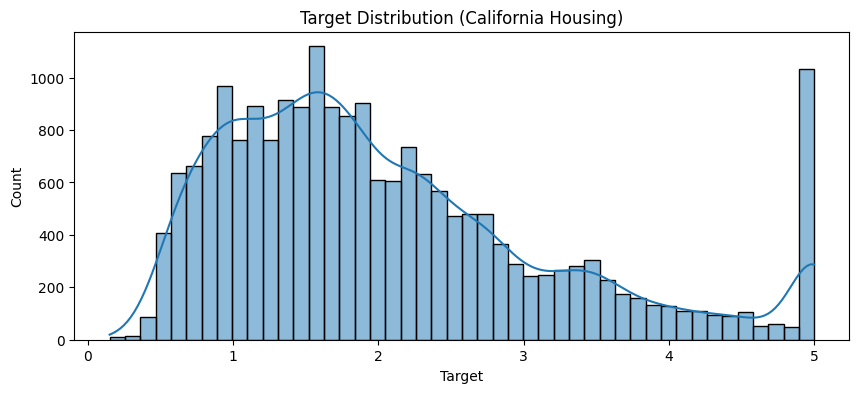

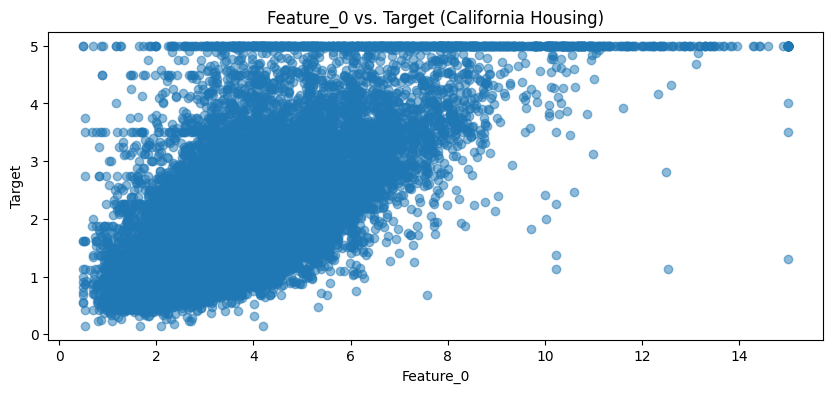


=== Inspecting Iris ===
Target dtype: int64
Number of unique target values: 3
Target is categorical (few unique values).
Suggested Algorithm: Classification (e.g., SVM, Logistic Regression)

Feature types:
Feature_0    float64
Feature_1    float64
Feature_2    float64
Feature_3    float64
dtype: object


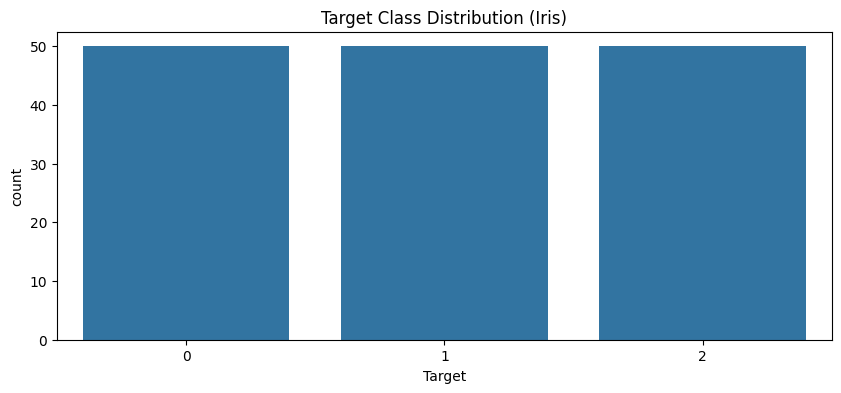

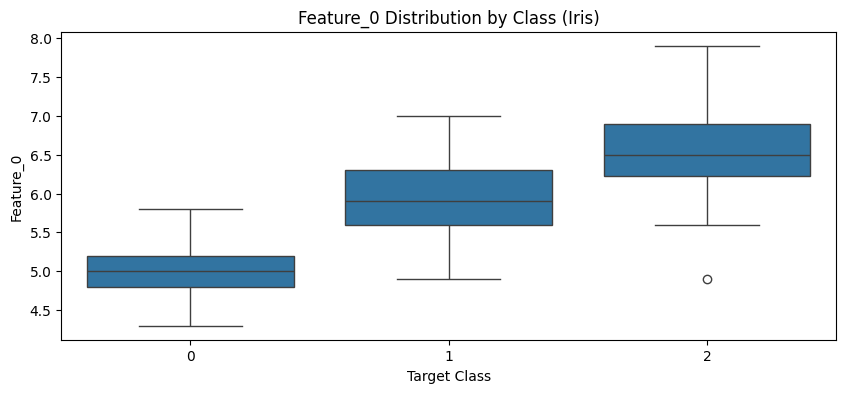

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_iris

def inspect_dataset(X, y, dataset_name):
    """Inspect dataset to suggest suitable algorithm."""
    print(f"\n=== Inspecting {dataset_name} ===")
    
    # Convert to DataFrame for easier analysis
    X_df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
    y_series = pd.Series(y, name='Target')
    
    # Check target type and unique values
    target_dtype = y_series.dtype
    unique_targets = y_series.nunique()
    is_numeric = np.issubdtype(target_dtype, np.number)
    print(f"Target dtype: {target_dtype}")
    print(f"Number of unique target values: {unique_targets}")
    
    # Suggest algorithm based on target
    if is_numeric and unique_targets > 10:  # Arbitrary threshold for continuous
        print("Target is continuous (numerical with many unique values).")
        print("Suggested Algorithm: Linear Regression (or other regression methods)")
    elif unique_targets <= 10:  # Arbitrary threshold for categorical
        print("Target is categorical (few unique values).")
        print("Suggested Algorithm: Classification (e.g., SVM, Logistic Regression)")
    else:
        print("Target is ambiguous. Check distribution or domain knowledge.")
    
    # Check feature types
    print("\nFeature types:")
    print(X_df.dtypes)
    
    # Check for categorical features (few unique values)
    for col in X_df.columns:
        unique_vals = X_df[col].nunique()
        if unique_vals < 10:
            print(f"Warning: {col} has {unique_vals} unique values, may be categorical.")
    
    # Visualize target distribution
    plt.figure(figsize=(10, 4))
    if is_numeric and unique_targets > 10:
        sns.histplot(y_series, kde=True)
        plt.title(f"Target Distribution ({dataset_name})")
    else:
        sns.countplot(x=y_series)
        plt.title(f"Target Class Distribution ({dataset_name})")
    plt.show()
    
    # Visualize feature-target relationships (for first feature as example)
    plt.figure(figsize=(10, 4))
    if is_numeric and unique_targets > 10:
        plt.scatter(X_df.iloc[:, 0], y_series, alpha=0.5)
        plt.title(f"Feature_0 vs. Target ({dataset_name})")
        plt.xlabel("Feature_0")
        plt.ylabel("Target")
    else:
        sns.boxplot(x=y_series, y=X_df.iloc[:, 0])
        plt.title(f"Feature_0 Distribution by Class ({dataset_name})")
        plt.xlabel("Target Class")
        plt.ylabel("Feature_0")
    plt.show()

# Load example datasets
# Regression: California Housing
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target
inspect_dataset(X_housing, y_housing, "California Housing")

# Classification: Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
inspect_dataset(X_iris, y_iris, "Iris")

plt.show()

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Set random seed for reproducibility
np.random.seed(42)

# Load the California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='Price')  # Convert to pandas Series

# Step 1: Clean the dataset and handle missing values
# Check for missing values
X['Neighborhood'] = pd.qcut(X['MedInc'], q=3, labels=['Low', 'Medium', 'High'])

# Step 2: Encode categorical variables
features = ['AveRooms', 'AveBedrms', 'HouseAge', 'Latitude', 'Longitude', 'Neighborhood']
X_selected = X[features]

# Step 3: Identify relevant features
# Correlation analysis
X_numeric = X_selected.drop('Neighborhood', axis=1)
corr_matrix = X_numeric.corrwith(y)
print("Correlation with Price:\n", corr_matrix.sort_values(ascending=False))

# Step 4: Preprocessing and model training
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['AveRooms', 'AveBedrms', 'HouseAge', 'Latitude', 'Longitude']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Neighborhood'])
    ])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train model
lr_pipeline.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = lr_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n=== Model Evaluation ===")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Step 6: Predict the price of a new house
new_house = pd.DataFrame({
    'AveRooms': [6.0],
    'AveBedrms': [3.0],
    'HouseAge': [20.0],
    'Latitude': [37.85],
    'Longitude': [-122.25],
    'Neighborhood': ['High']
})
predicted_price = lr_pipeline.predict(new_house)[0]
print("\n=== Prediction for New House ===")
print(f"Predicted Price: ${predicted_price * 100_000:.2f}")

Correlation with Price:
 AveRooms     0.151948
HouseAge     0.105623
Longitude   -0.045967
AveBedrms   -0.046701
Latitude    -0.144160
dtype: float64

=== Model Evaluation ===
Mean Squared Error: 0.6744889089876005
R² Score: 0.48528366320182104

=== Prediction for New House ===
Predicted Price: $250541.17


In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import re

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Load and preprocess the dataset
categories = ['alt.atheism', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = (newsgroups.target == 1).astype(int)

# Simulate additional features
data = pd.DataFrame({'content': X, 'label': y})
data['length'] = data['content'].apply(len)
data['has_hyperlink'] = data['content'].apply(lambda x: 1 if re.search(r'http[s]?://', x) else 0)
data['sender_domain'] = np.random.choice(['gmail.com', 'yahoo.com', 'outlook.com'], size=len(data))

# Step 2: Preprocess text and categorical features
text_feature = 'content'
numerical_features = ['length', 'has_hyperlink']
categorical_feature = 'sender_domain'

preprocessor = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
])

X_features = data[[text_feature, *numerical_features, categorical_feature]]
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('text', preprocessor, text_feature),
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [categorical_feature])
        ]
    )),
    ('classifier', SVC(kernel='rbf', C=1.0, random_state=42))
])

model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Step 5: Deploy the model to classify new emails
new_email = pd.DataFrame({
    'content': ["Free software download at http://example.com, click now!"],
    'length': [len("Free software download at http://example.com, click now!")],
    'has_hyperlink': [1],
    'sender_domain': ['yahoo.com']
})

prediction = model.predict(new_email)[0]
print("\n=== New Email Classification ===")
print("Prediction:", "Spam" if prediction == 1 else "Not Spam")

KeyboardInterrupt: 

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Load and clean the dataset
# Simulate dataset (since no real dataset provided)
n_samples = 1000
data = pd.DataFrame({
    'total_spending': np.random.lognormal(mean=5, sigma=1, size=n_samples),
    'age': np.random.randint(18, 80, size=n_samples),
    'num_visits': np.random.randint(1, 50, size=n_samples),
    'purchase_frequency': np.random.uniform(0.1, 5.0, size=n_samples),
    'high_value': np.where(np.random.lognormal(mean=5, sigma=1, size=n_samples) > 150, 1, 0)
})
data.loc[np.random.choice(data.index, 50), 'total_spending'] = np.nan  # Add missing values
data.loc[np.random.choice(data.index, 20), 'age'] = 150  # Add outliers

# Handle missing values
imputer = SimpleImputer(strategy='median')
data[['total_spending', 'age', 'num_visits', 'purchase_frequency']] = imputer.fit_transform(
    data[['total_spending', 'age', 'num_visits', 'purchase_frequency']]
)

# Handle outliers (cap age at 100)
data['age'] = data['age'].clip(upper=100)

# Features and target
X = data[['total_spending', 'age', 'num_visits', 'purchase_frequency']]
y = data['high_value']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Divide the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Find separating hyperplane (SVM)
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Step 4: Find rules (Decision Tree)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Export decision tree rules
from sklearn.tree import export_text
rules = export_text(dt, feature_names=X.columns.tolist())
print("\n=== Decision Tree Rules ===")
print(rules)

# Step 5: Evaluate the model
y_pred_svm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("\n=== Model Evaluation (SVM) ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)


=== Decision Tree Rules ===
|--- num_visits <= 0.61
|   |--- total_spending <= 1.93
|   |   |--- age <= -0.59
|   |   |   |--- class: 1
|   |   |--- age >  -0.59
|   |   |   |--- class: 0
|   |--- total_spending >  1.93
|   |   |--- purchase_frequency <= 0.41
|   |   |   |--- class: 1
|   |   |--- purchase_frequency >  0.41
|   |   |   |--- class: 1
|--- num_visits >  0.61
|   |--- purchase_frequency <= -1.77
|   |   |--- class: 0
|   |--- purchase_frequency >  -1.77
|   |   |--- age <= 1.17
|   |   |   |--- class: 1
|   |   |--- age >  1.17
|   |   |   |--- class: 1


=== Model Evaluation (SVM) ===
Accuracy: 0.5200
Precision: 0.4655
Recall: 0.6136
F1 Score: 0.5294
Confusion Matrix:
 [[50 62]
 [34 54]]
